<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/Porter_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Porter Neural Networks

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

Import Packages

In [63]:
# Import required packages
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from datetime import datetime
warnings.filterwarnings('ignore')


Import & Load data

In [64]:
df=pd.read_csv("/content/dataset.csv")

Statistical Summary


Meta-data of dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

Description of the dataframe


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [67]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
market_id,196441.0,NaN,NaN,NaN,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
created_at,197428,180985,2015-02-11 19:50:43,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_primary_category,192668,74,american,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_protocol,196433.0,NaN,NaN,NaN,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,NaN,NaN,NaN,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,NaN,NaN,NaN,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,NaN,NaN,NaN,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,NaN,NaN,NaN,686.21847,522.038648,-86.0,299.0,595.0,949.0,14700.0


In [68]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


Shape of the data


In [69]:
### Data shape
print("Porter dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Porter dataset has 197428 rows and 14 columns.


Size & Count

In [70]:
# total number of elements/records 
df.size

2763992

Column Names

In [71]:
# Columna names
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

Column data typess

In [72]:
### Data type of all attributes
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

 Each column corresponds to a feature as explained below.

1.market_id : integer id for the market where the restaurant lies

2.created_at : the timestamp at which the order was placed

3.actual_delivery_time : the timestamp when the order was delivered

4.store_primary_category : category for the restaurant

5.order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

6.total_items subtotal : final price of the order

7.num_distinct_items : the number of distinct items in the order

8.min_item_price : price of the cheapest item in the order

9.max_item_price : price of the costliest item in order

10.total_onshift_partners : number of delivery partners on duty at the time order was placed

11.total_busy_partners : number of delivery partners attending to other tasks

12.total_outstanding_orders : total number of orders to be fulfilled at the moment




In [73]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


##EDA(Explortory Data Analysis)

##Data preprocessing

### Missing Values 

<Axes: >

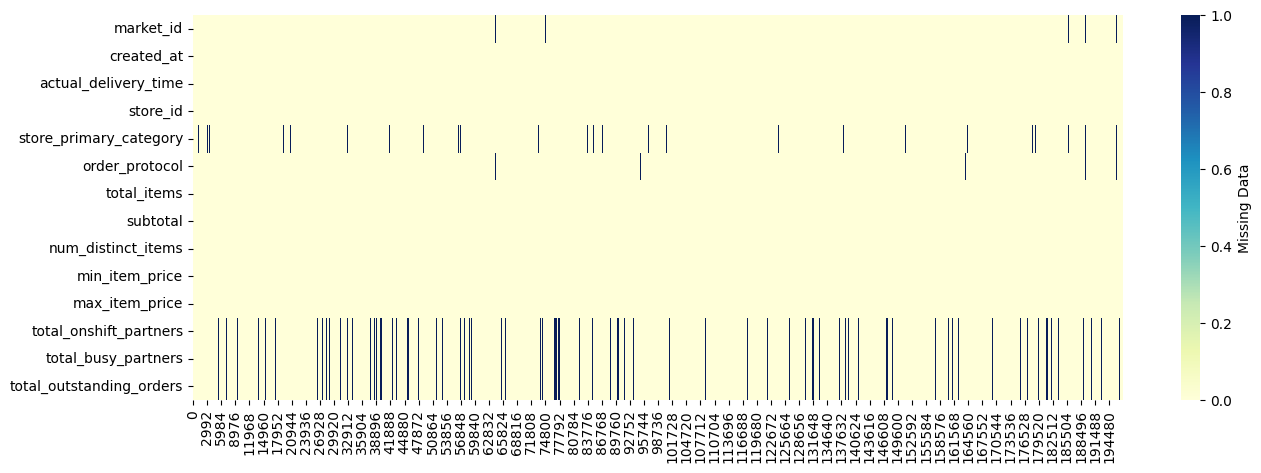

In [74]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [75]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

,Null Values,Percentage Null Value
market_id,987,0.499929
created_at,0,0.000000
actual_delivery_time,7,0.003546
store_id,0,0.000000
store_primary_category,4760,2.411006
order_protocol,995,0.503981
total_items,0,0.000000
subtotal,0,0.000000
num_distinct_items,0,0.000000
min_item_price,0,0.000000


In [76]:
df.market_id.unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [77]:
df.market_id.value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

In [78]:

mode_value = df['market_id'].mode()[0]
print(mode_value)

# Impute missing values with the mode
df['market_id'].fillna(mode_value, inplace=True)

2.0


In [79]:
df.order_protocol.unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [80]:
df.order_protocol.value_counts()

1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [81]:

mode_value = df['order_protocol'].mode()[0]
print(mode_value)

# Impute missing values with the mode
df['order_protocol'].fillna(mode_value, inplace=True)

1.0


In [82]:
df.total_onshift_partners.unique()

array([ 33.,   1.,   6.,   2.,  10.,   7.,   8.,   3.,  16.,   5.,   4.,
        24.,  12.,  19.,  21.,  22.,  27.,  13.,  18., 117., 130., 121.,
        94.,  34.,  17.,  38.,  20.,  15.,  39.,  26.,  30.,  35.,  11.,
        14.,  32.,  29.,  25.,  23.,  61.,  41.,  58.,  51.,  57.,  60.,
         9., 108.,  72.,  89., 112.,  55., 126.,  80.,  69., 125., 113.,
       105.,  98.,  86.,  90.,  87.,  74.,  84.,  91.,  96., 123., 101.,
       119.,  nan, 129.,  66.,  81.,  36.,  75.,  43.,  70.,  65.,  77.,
       114.,  62., 116., 102.,  76.,  67.,  64.,  88.,  73.,  63.,  46.,
        28.,  47., 110.,  97.,  42.,  79.,  49.,  50.,  37.,  92., 103.,
        44.,  68.,  56.,   0., 107.,  78.,  71., 128., 104.,  45.,  31.,
       100.,  40.,  53., 115., 109.,  99.,  85.,  59., 118.,  54.,  52.,
        48., 132., 127., 133., 131., 149.,  93., 111.,  95.,  82., 136.,
       120., 134., 124., 106., 137.,  83., 152., 147., 144., 150., 145.,
       122., 155., 135., 151., 140., 141., 143., 13

In [83]:
df.total_onshift_partners.value_counts()

 0.0      3615
 18.0     2924
 15.0     2912
 21.0     2841
 19.0     2824
          ... 
 164.0       1
 159.0       1
 169.0       1
-4.0         1
 168.0       1
Name: total_onshift_partners, Length: 172, dtype: int64

In [84]:
median_value = df['total_onshift_partners'].median()

df['total_onshift_partners'].fillna(median_value, inplace=True)

In [85]:
median_value = df['total_busy_partners'].median()

df['total_busy_partners'].fillna(median_value, inplace=True)

In [86]:
median_value = df['total_outstanding_orders'].median()

df['total_outstanding_orders'].fillna(median_value, inplace=True)

In [87]:

df['actual_delivery_time'] = df['actual_delivery_time'].fillna(method='ffill')

In [88]:
df.store_primary_category.unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [89]:
df.store_primary_category.value_counts()

american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [90]:

df['store_primary_category'] = df['store_primary_category'].fillna(method='ffill')

In [93]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

,Null Values,Percentage Null Value
market_id,0,0.0
created_at,0,0.0
actual_delivery_time,0,0.0
store_id,0,0.0
store_primary_category,0,0.0
order_protocol,0,0.0
total_items,0,0.0
subtotal,0,0.0
num_distinct_items,0,0.0
min_item_price,0,0.0


In [112]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_date,created_time,actual_delivery_date,actual_deli_time,time_difference_minutes,created_day_of_week,actual_delivery_day_of_week
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,2015-02-06,22:24:17,2015-02-06,23:27:16,62.983333,Friday,Friday
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,2015-02-10,21:49:25,2015-02-10,22:56:29,67.066667,Tuesday,Tuesday
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,mexican,1.0,1,1900,1,1900,...,1.0,0.0,0.0,2015-01-22,20:39:28,2015-01-22,21:09:09,29.683333,Thursday,Thursday
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,mexican,1.0,6,6900,5,600,...,1.0,1.0,2.0,2015-02-03,21:21:45,2015-02-03,22:13:00,51.250000,Tuesday,Tuesday
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,mexican,1.0,3,3900,3,1100,...,6.0,6.0,9.0,2015-02-15,02:40:36,2015-02-15,03:20:26,39.833333,Sunday,Sunday


## Data Pre-Proceesing & Feature Engineering



In [95]:
df["created_at"] = pd.to_datetime(df["created_at"])
df['created_date'] = df['created_at'].dt.date
df['created_time'] = df['created_at'].dt.time

In [96]:
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df['actual_delivery_date'] = df['actual_delivery_time'].dt.date
df['actual_deli_time'] = df['actual_delivery_time'].dt.time

In [100]:
df['time_difference_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [102]:

df['created_day_of_week'] = df['created_at'].dt.day_name()

In [103]:
df['actual_delivery_day_of_week'] = df['actual_delivery_time'].dt.day_name()

market_id                             float64
created_at                     datetime64[ns]
actual_delivery_time           datetime64[ns]
store_id                               object
store_primary_category                 object
order_protocol                        float64
total_items                             int64
subtotal                                int64
num_distinct_items                      int64
min_item_price                          int64
max_item_price                          int64
total_onshift_partners                float64
total_busy_partners                   float64
total_outstanding_orders              float64
created_date                           object
created_time                           object
actual_delivery_date                   object
actual_deli_time                       object
time_difference_minutes               float64
created_day_of_week                    object
actual_delivery_day_of_week            object
dtype: object

In [113]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_date', 'created_time',
       'actual_delivery_date', 'actual_deli_time', 'time_difference_minutes',
       'created_day_of_week', 'actual_delivery_day_of_week'],
      dtype='object')

In [121]:
cat_fea = []
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values < 30:
        cat_fea.append(column)


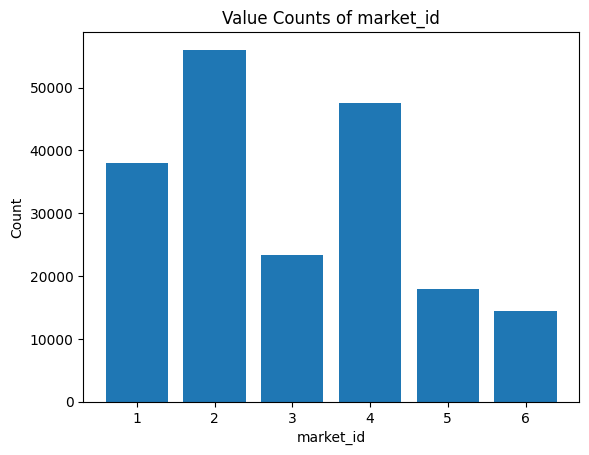

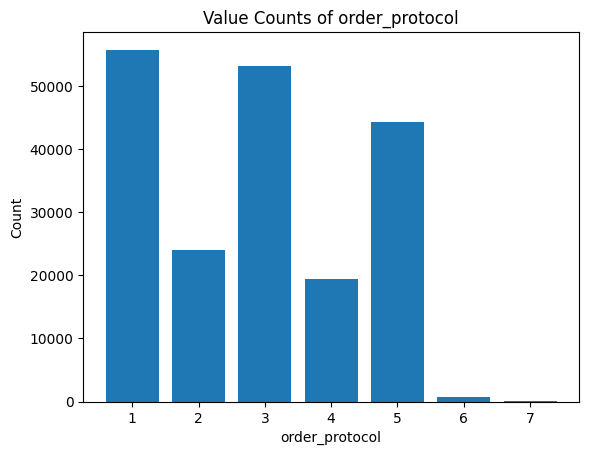

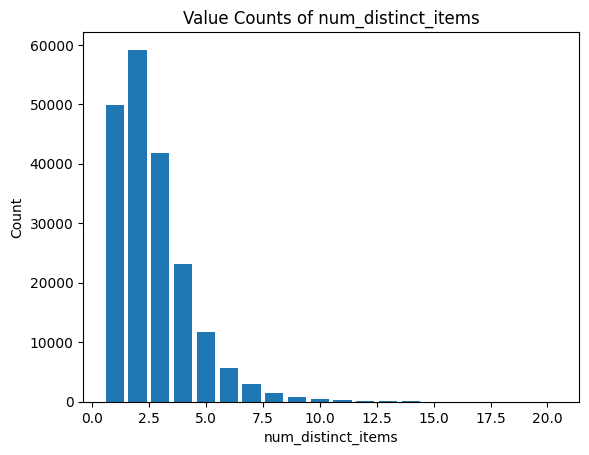

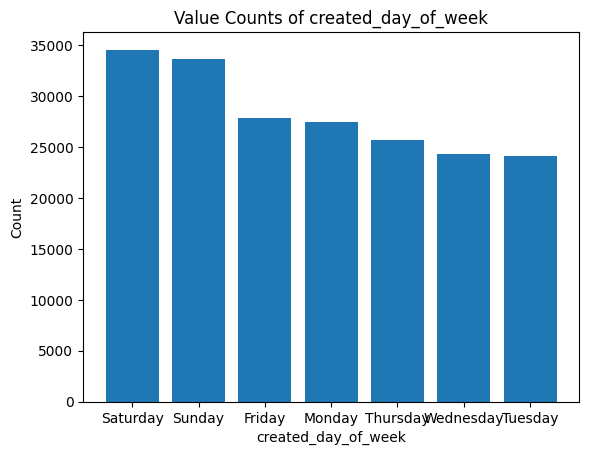

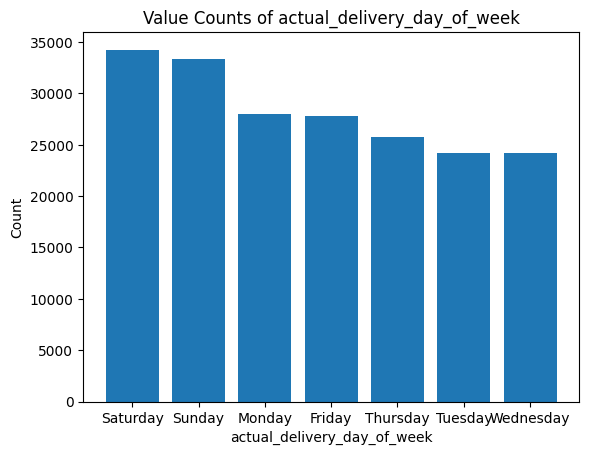

In [122]:
SubCol=['market_id','store_primary_category', 'order_protocol','created_day_of_week', 'actual_delivery_day_of_week']
for column in cat_fea:
  value_counts = df[column].value_counts()

  # Create a bar plot
  plt.bar(value_counts.index, value_counts.values)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f'Value Counts of {column}')

  # Display the plot

  plt.show()


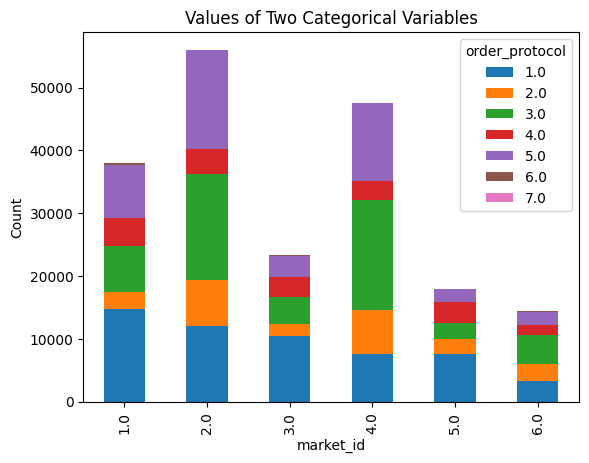

In [116]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['market_id'], df['order_protocol'])

# Create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('market_id')
plt.ylabel('Count')
plt.title('Values of Two Categorical Variables')

# Display the plot
plt.show()